In [1]:
import TextToSpeechFromImage as tts
import cv2
import matplotlib.pyplot as plt 

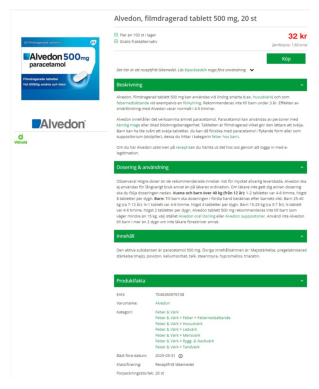

In [2]:
image_path = 'medicin#2.jpg'
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

roi division works

In [3]:
roi_coordinates = {}
x = 340
width = 660

roi_coordinates['TITEL'] = (x,0,width-50,50)
roi_coordinates['PRIS'] = (900,70,150,70)
roi_coordinates['BILD'] = (30,100,270,250)
roi_coordinates['BESKRIVNING'] = (x,230,width,280)
roi_coordinates['ANVÄNDNING'] = (x,510,width,240)
roi_coordinates['INNEHÅLL'] = (x,750,width,150)
roi_coordinates['PRODUKTFAKTA'] = (x,900,width,400)


In [ ]:
# Global variables to store the coordinates of the rectangle
rect_start = None
rect_end = None

# Flag to track if the window is closed
window_closed = False

# Function to handle mouse events
def mouse_callback(event, x, y, flags, param):
    # global rect_start, rect_end

    # If the left mouse button is clicked, record the starting coordinates of the rectangle
    if event == cv2.EVENT_LBUTTONDOWN:
        rect_start = (x, y)

    # If the left mouse button is released, record the ending coordinates of the rectangle
    elif event == cv2.EVENT_LBUTTONUP:
        rect_end = (x, y)

        # Draw the rectangle on the image
        cv2.rectangle(param, rect_start, rect_end, (0, 0, 255), 2)
        cv2.imshow("Image", param)

        # Print the coordinates of the rectangle
        print("Rectangle coordinates:", rect_start, rect_end)

        # Update the flag to indicate that the window is still open
        global window_closed
        window_closed = False

# Load an image
# image_path = "image.jpg"
image = cv2.imread(image_path)
if image is None:
    print(f"Error: Unable to load the image. Please check the file path and ensure it exists. Current path: {image_path}")
    exit()

clone = image.copy()

# Create a window and bind the mouse callback function
cv2.namedWindow("Image")
cv2.setMouseCallback("Image", mouse_callback, clone)
cv2.imshow("Image", image)

# Wait for the user to define the rectangle
while True:
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q") or window_closed:
        break
    if cv2.getWindowProperty("Image", cv2.WND_PROP_VISIBLE) < 1:
        window_closed = True

# Save the image with the drawn rectangle
image_with_rectangle = clone.copy()
cv2.imwrite("image_with_rectangle.jpg", image_with_rectangle)

# Close the window
cv2.destroyAllWindows()


In [4]:
rois = tts.BasicImageHandeling.divide_rois(image,roi_coordinates)

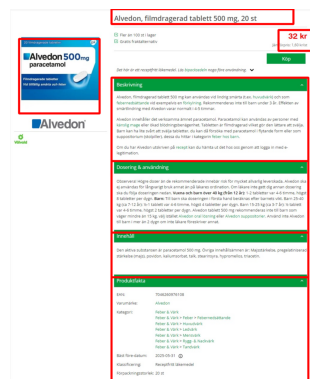

In [5]:
tts.BasicImageHandeling.view_rois(image,roi_coordinates)

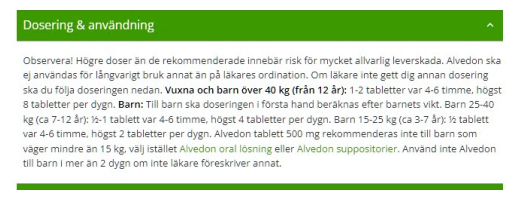

In [6]:
tts.BasicImageHandeling.show_image(rois['ANVÄNDNING'])

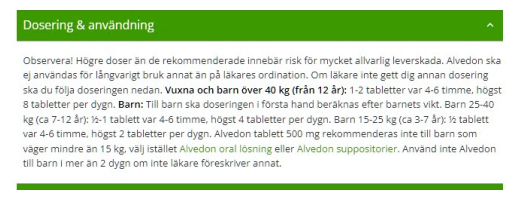

In [7]:
# The cropping and show img functs work properly: 
x, y,w,h = roi_coordinates['ANVÄNDNING']
roi = image[y:y+h, x:x+w]
tts.BasicImageHandeling.show_image(roi)


Improve text clarity:

In [8]:
enhanced_img = tts.TextToSpeech.enhance_text(rois['ANVÄNDNING'])

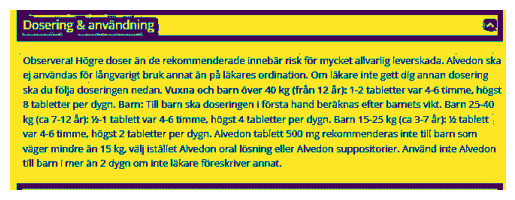

In [9]:
tts.BasicImageHandeling.show_image(enhanced_img)

Improved vs original text

In [10]:
txt = tts.TextToSpeech.extract_text_from_image(rois['ANVÄNDNING'])
print(txt)

'Observera! Högre doser än de rekommenderade innebär risk för mycket allvarlig leverskada. Alvedon ska
ej användas för långvarigt bruk annat än på läkares ordination. Om läkare inte gett dig annan dosering
ska du följa doseringen nedan. Vuxna och barn över 40 kg (från 12 år): 1-2 tabletter var 4-6 timme, högst
8 tabletter per dygn. Barn: Till barn ska doseringen i första hand beräknas efter barnets vikt. Barn 25-40
kg (ca 7-12 år): -1 tablett var 4-6 timme, högst 4 tabletter per dygn. Barn 15-25 kg (ca 3-7 år): 3 tablett
var 4-6 timme, högst 2 tabletter per dygn. Alvedon tablett 500 mg rekommenderas inte till barn som
väger mindre än 15 kg, välj istället Alvedon oral lösning eller Alvedon suppositorier. Använd inte Alvedon
MAEar tnn EET



In [11]:
txt = tts.TextToSpeech.extract_text_from_image(enhanced_img) #TODO: wtf
print(txt)

Haaa
Observera! Högre doser än de rekommenderade innebär risk för mycket altvarlig leverskada. Alvedon ska
ej användas för långvarigt bruk annat än på läkares ordination. Om läkare inte gett dig annan dosering
ska du följa doseringen nedan. Vuxna och barn över 40 kg ffrån 12 år): 1-2 tabletter var 4-6 timme, högst
8 tabletter per dygn. Barn: Till barn ska doseringen i första hand beräknas efter barnets vikt. Barn 25-40
kg (ca 7-12 år): 1 tablett var 4-6 timme, högst 4 tabletter per dygn. Barn 15-25 kg (ca 3-7 år): 3 tabiett
var 4-6 timme, högst 2 tabletter per dygn. Alvedon tablett 500 mg rekommenderas inte till barn som
väger mindre än 15 kg, välj istället Alvedon oral lösning eller Alvedon suppositorier. Använd inte Alvedon
till barn i mer än 2 dygn om inte läkare föreskriver annat.

———mm—A————



summirize


In [12]:
summary = tts.TextToSpeech.summarize_text(txt)
print(len(summary),len(txt))


225 809


txt -> speech

In [13]:
tts.TextToSpeech.read_text(summary)

In [14]:
# p = tts.TextToSpeech.format_text(summary)
# print(p)

pic + text test 2

(-0.5, 659.5, 341.5, -0.5)

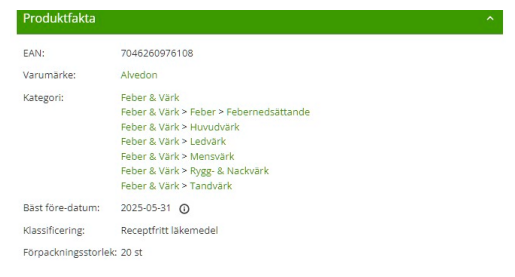

In [15]:
plt.imshow(rois['PRODUKTFAKTA'])
plt.axis('off')

In [16]:
extracted_txt = tts.TextToSpeech.extract_text_from_image(rois['PRODUKTFAKTA'])

In [18]:
print(extracted_txt)

Produktfakta A
EAN: 7046260976108
Varumärke: Alvedon
Kategori: Feber & Värk
Feber & Värk > Feber > Febernedsättande
Feber & Värk > Huvudvärk
Feber & Värk > Ledvärk
Feber & Värk > Mensvärk
Feber & Värk > Rygg- & Nackvärk
Feber & Värk > Tandvärk
Bäst före-datum: — 2025-05-31 Q
Klassificering: Receptfritt läkemedel
Förpackningsstorlek: 20 st



In [19]:
imporoved_text = tts.TextToSpeech.enhance_text(rois['PRODUKTFAKTA'])
imporoved_text = tts.TextToSpeech.extract_text_from_image(rois['PRODUKTFAKTA'])
print(imporoved_text)
# In this text, its already good

Produktfakta A
EAN: 7046260976108
Varumärke: Alvedon
Kategori: Feber & Värk
Feber & Värk > Feber > Febernedsättande
Feber & Värk > Huvudvärk
Feber & Värk > Ledvärk
Feber & Värk > Mensvärk
Feber & Värk > Rygg- & Nackvärk
Feber & Värk > Tandvärk
Bäst före-datum: — 2025-05-31 Q
Klassificering: Receptfritt läkemedel
Förpackningsstorlek: 20 st



In [22]:
summary = tts.TextToSpeech.summarize_text(imporoved_text)
tts.TextToSpeech.read_text(summary)


bild:

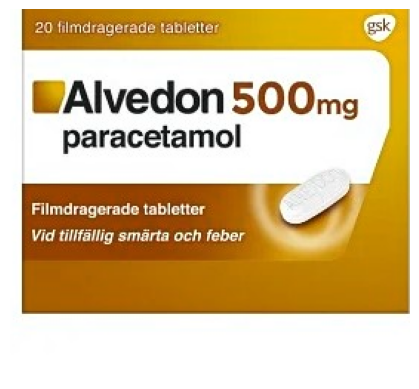

In [20]:
plt.imshow(rois['BILD'])
plt.axis('off')
plt.show()